In [173]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import scipy

In [125]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [126]:
sb.set(style="darkgrid")

In [127]:
data = pd.read_csv('credit_card_default_analysis.csv')

In [128]:
#data = data.drop(['ID'], axis=1)

In [129]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [131]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


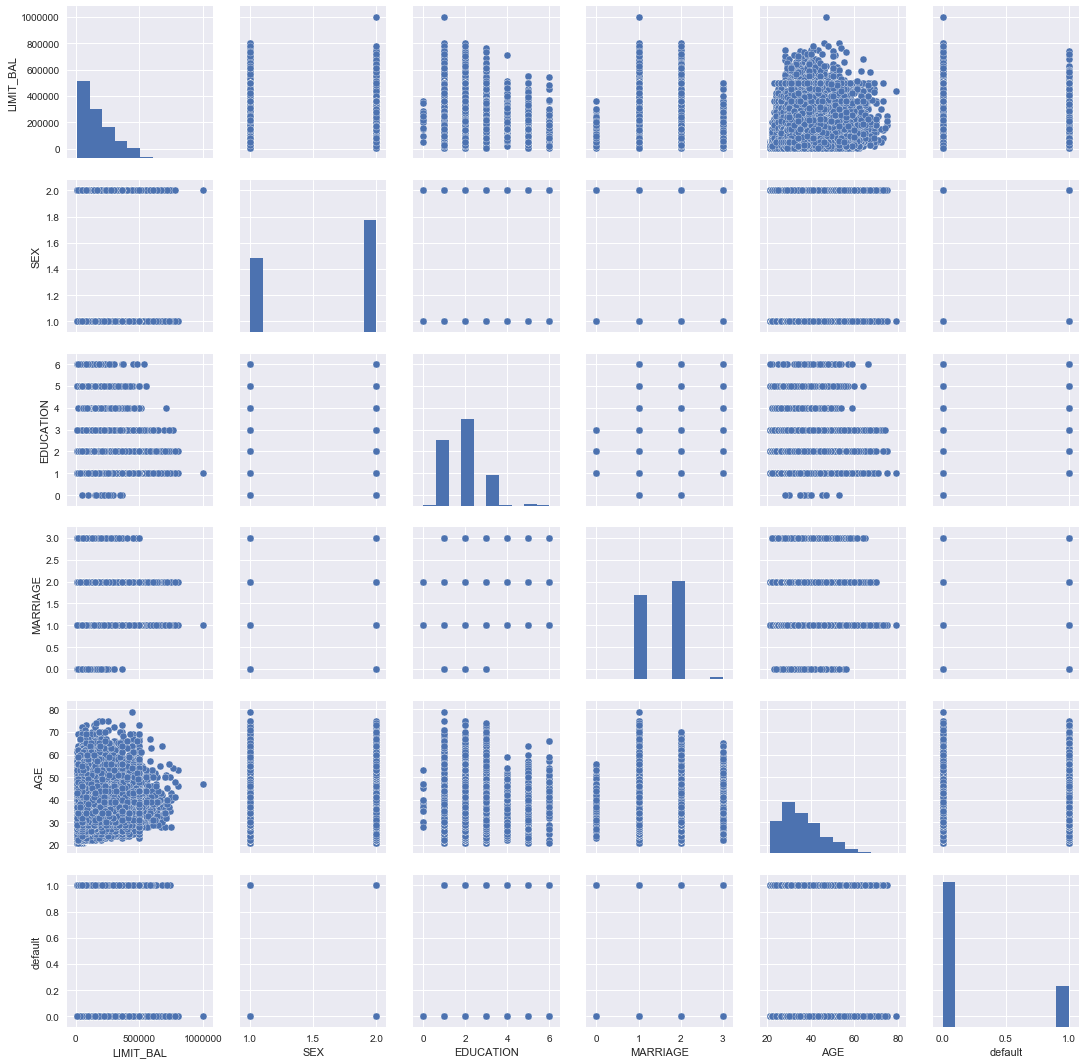

In [132]:
sb.pairplot(data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default']])

# Задание 1
### Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:

### a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

In [133]:
limit_bal_not_returned = data[data['default'] == 1].LIMIT_BAL.values
limit_bal_returned = data[data['default'] == 0].LIMIT_BAL.values

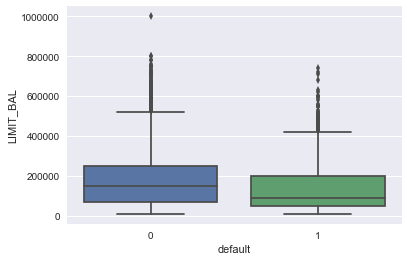

In [134]:
ax = sb.boxplot(x='default', y='LIMIT_BAL', data=data)
#ax = sb.swarmplot(x='default', y='LIMIT_BAL', data=data, color=".25")

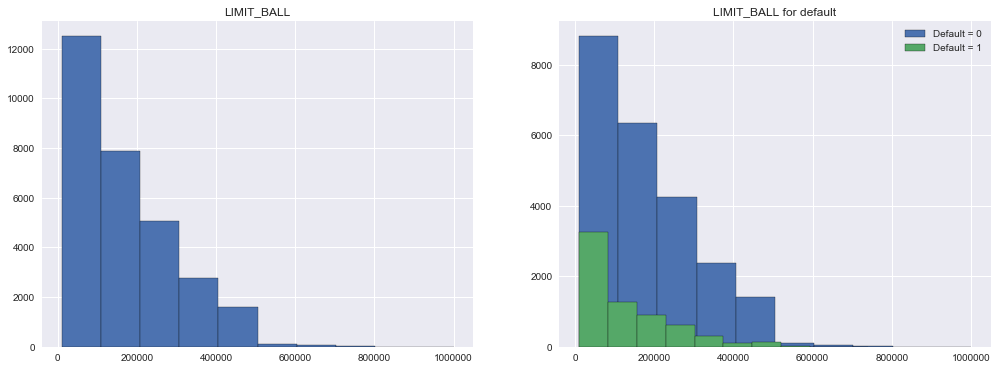

In [180]:
plt.figure(figsize=(17,6))

plt.subplot(1, 2, 1)
plt.title('LIMIT_BALL')
plt.hist(data['LIMIT_BAL'], edgecolor='k')

plt.subplot(1, 2, 2)
plt.title('LIMIT_BALL for default')
plt.hist(limit_bal_returned, edgecolor='k', label='Default = 0')
plt.hist(limit_bal_not_returned, edgecolor='k', label='Default = 1')
plt.legend()

In [135]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [136]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка медианы

In [137]:
np.random.seed(0)

limit_bal_not_returned_scores = list(map(np.median, get_bootstrap_samples(limit_bal_not_returned, 1000)))
limit_bal_returned_scores = list(map(np.median, get_bootstrap_samples(limit_bal_returned, 1000)))

print ("95% confidence interval for the not returned median limit bal:",  stat_intervals(limit_bal_not_returned_scores, 0.05))
print ("95% confidence interval for the returned median limit bal:",  stat_intervals(limit_bal_returned_scores, 0.05))

95% confidence interval for the not returned median limit bal: [80000. 90000.]
95% confidence interval for the returned median limit bal: [150000. 150000.]


### Интервальная оценка разности медиан

In [138]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(limit_bal_not_returned_scores, limit_bal_returned_scores)))

In [139]:
print ("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [60000. 70000.]


### b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


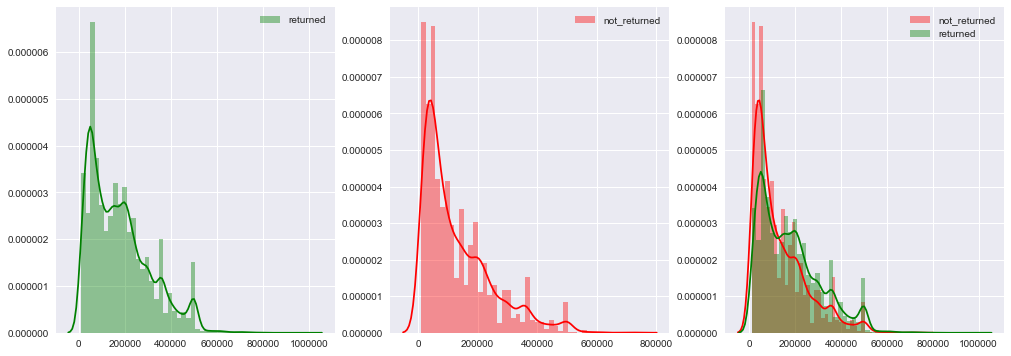

In [140]:
plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
sb.distplot(limit_bal_returned, color='green')
plt.legend(['returned'])

plt.subplot(1,3,2)
sb.distplot(limit_bal_not_returned, color='red')
plt.legend(['not_returned'])

plt.subplot(1,3,3)
sb.distplot(limit_bal_not_returned, color='red')
sb.distplot(limit_bal_returned, color='green')
plt.legend(['not_returned', 'returned'])

### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

1. В каждой из выборок должно быть не менее 3 значений признака - выполняеться
2. В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10) - выполняеться

In [141]:
scipy.stats.mannwhitneyu(limit_bal_not_returned, limit_bal_returned)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

<b>Нулевая гипотеза отвергается - между распределениями есть сдвиг.</b>

# Задание 2
### Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [142]:
male = data[data['SEX'] == 1].default.tolist()
female = data[data['SEX'] == 2].default.tolist()

Text(0.5, 1.0, 'male and female')

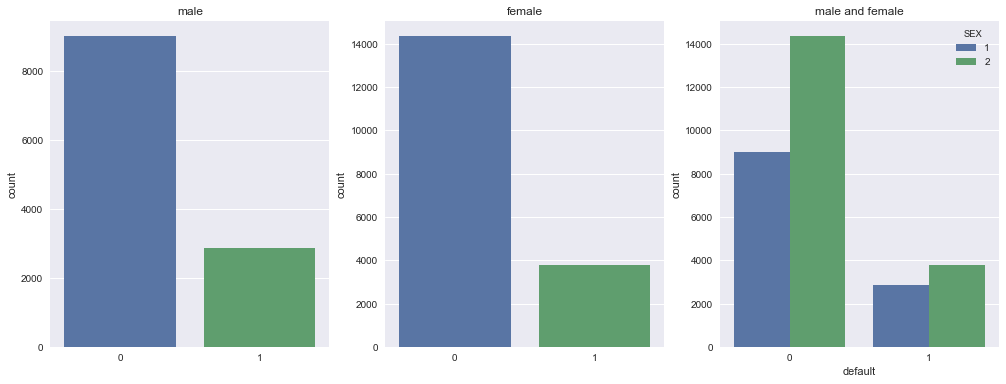

In [143]:
plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
sb.countplot(x=male)
plt.title('male')

plt.subplot(1,3,2)
sb.countplot(x=female)
plt.title('female')

plt.subplot(1,3,3)
sb.countplot(x='default', hue='SEX', data=data)
plt.title('male and female')

In [144]:
print('Proportion male not returned:', np.mean(male))
print('Proportion female not returned:', np.mean(female))

Proportion male not returned: 0.2416722745625841
Proportion female not returned: 0.20776280918727916


In [145]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [146]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [147]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [148]:
print ("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(male, female))

95% confidence interval for a difference between proportions: [0.024207, 0.043612]


<b>Полученный интервал строго больше нуля.</b>

$H_0\colon p_1 = p_2$

$H_1\colon p_1 \neq p_2$

In [149]:
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(male, female)))
proportions_diff_z_test(proportions_diff_z_stat_ind(male, female))

p-value: 0.000000


4.472866521609831e-12

In [150]:
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(male, female), 'less'))

p-value: 1.000000


In [151]:
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(male, female), 'greater'))

p-value: 0.000000


<b>Полученное значение p-value меньше 0.05, что говорит о статистических различиях между мужчинами и женщинами</b><br>
<b>В то же время это различие составляет от 2.3% к 4.3%</b><br>
<b>Поэтому признак SEX при построение модели можно считать незначимым</b>

# Задание 3
### Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

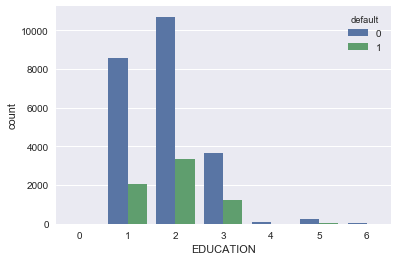

In [152]:
sb.countplot(x='EDUCATION', hue='default', data=data)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Кредиты с просрочками, взависимости от образования')

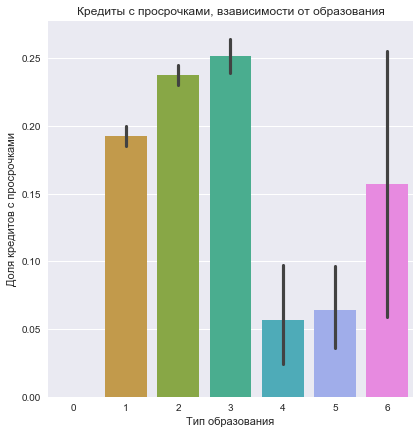

In [153]:
sb.factorplot(x='EDUCATION', y='default',  data=data, kind="bar", size = 6)
plt.ylabel('Доля кредитов с просрочками')
plt.xlabel('Тип образования')
plt.title('Кредиты с просрочками, взависимости от образования')

<b>На данном графике отчетливо видно, что чаще всего не возвращают кредит <i>выпускник школы(3) и бакалавры(2)</i></b><br>
<b>Чаще всего возвращают кредиты <i>доктора(0)</i></b>

In [154]:
contingency_table = data.groupby(['default', 'EDUCATION']).count()['ID'].unstack(level=-1).fillna(0).astype(int)
contingency_table

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


### Критерий Хи-квадрат

$H_0\colon$ независимость наблюдаемых частот в таблице сопряженности

$H_1\colon$ $H_0$ неверна

Выборка достаточно большая, так что можем использовать критерий Хи-квадрат

In [155]:
result_chi2 = scipy.stats.chi2_contingency(contingency_table)
print('chi2_stat = ', result_chi2[0])
print('p-value = ', result_chi2[1])
print('dof = ', result_chi2[2])
print('expected  = ', result_chi2[3])

chi2_stat =  163.21655786997073
p-value =  1.2332626245415605e-32
dof =  6
expected  =  [[1.0903200e+01 8.2435980e+03 1.0926564e+04 3.8293596e+03 9.5792400e+01
  2.1806400e+02 3.9718800e+01]
 [3.0968000e+00 2.3414020e+03 3.1034360e+03 1.0876404e+03 2.7207600e+01
  6.1936000e+01 1.1281200e+01]]


In [156]:
contingency_table_expected = contingency_table.copy()
buf_table = pd.DataFrame(result_chi2[3])
buf_table.columns = contingency_table.columns

for col in contingency_table:
    contingency_table_expected[col] = buf_table[col]
    
del buf_table

In [157]:
contingency_table_expected

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,10.9032,8243.598,10926.564,3829.3596,95.7924,218.064,39.7188
1,3.0968,2341.402,3103.436,1087.6404,27.2076,61.936,11.2812


In [158]:
def v_cramer(chi, n, shape):
    return np.sqrt(chi/n/(min(shape[0], shape[1])-1))

In [159]:
print('v-cramer:', v_cramer(result_chi2[0], len(data), contingency_table.shape))
print('p-value = ', result_chi2[1])

v-cramer: 0.07376009713252163
p-value =  1.2332626245415605e-32


$H_0$ отвергается в пользу альтернативы $H_1$ <br>
<b>Образование влияет на то, вернет ли человек долг. Этот параметр значим.</b>

# Задание 4
### Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Кредиты с просрочками, взависимости от образования')

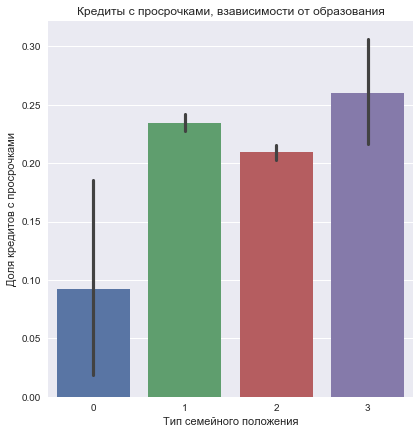

In [160]:
sb.factorplot(x='MARRIAGE', y='default',  data=data, kind="bar", size = 6)
plt.ylabel('Доля кредитов с просрочками')
plt.xlabel('Тип семейного положения')
plt.title('Кредиты с просрочками, взависимости от образования')

In [161]:
contingency_table = data.groupby(['default', 'MARRIAGE']).count()['ID'].unstack(level=-1).fillna(0).astype(int)
contingency_table

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


### Критерий Хи-квадрат

$H_0\colon$ независимость наблюдаемых частот в таблице сопряженности

$H_1\colon$ $H_0$ неверна

Выборка достаточно большая, так что можем использовать критерий Хи-квадрат

In [162]:
result_chi2 = scipy.stats.chi2_contingency(contingency_table)
print('chi2_stat = ', result_chi2[0])
print('p-value = ', result_chi2[1])
print('dof = ', result_chi2[2])
print('expected  = ', result_chi2[3])

chi2_stat =  35.66239583433609
p-value =  8.825862457577375e-08
dof =  3
expected  =  [[4.20552000e+01 1.06376292e+04 1.24327632e+04 2.51552400e+02]
 [1.19448000e+01 3.02137080e+03 3.53123680e+03 7.14476000e+01]]


In [163]:
contingency_table_expected = contingency_table.copy()
buf_table = pd.DataFrame(result_chi2[3])
buf_table.columns = contingency_table.columns

for col in contingency_table:
    contingency_table_expected[col] = buf_table[col]
    
del buf_table

In [164]:
contingency_table_expected

MARRIAGE,0,1,2,3
default,,,,
0,42.0552,10637.6292,12432.7632,251.5524
1,11.9448,3021.3708,3531.2368,71.4476


In [165]:
print('v-cramer:', v_cramer(result_chi2[0], len(data), contingency_table.shape))
print('p-value = ', result_chi2[1])

v-cramer: 0.034478203662766466
p-value =  8.825862457577375e-08


$H_0$ отвергается в пользу альтернативы $H_1$ <br>
<b>Семейное положение влияет на то, вернет ли человек долг. Этот параметр значим.</b>

# Задание 5
### Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы:

### a) о равенстве медианных значений возрастов людей

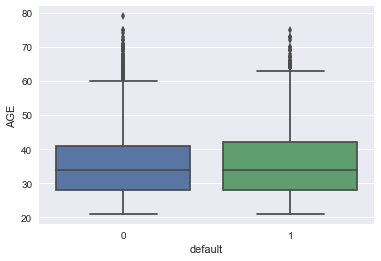

In [166]:
sb.boxplot(x='default', y='AGE', data=data)

In [167]:
age_not_returned = data[data['default'] == 1].AGE.values
age_returned = data[data['default'] == 0].AGE.values

### Интервальная оценка медианы

In [168]:
np.random.seed(0)

age_not_returned_scores = list(map(np.median, get_bootstrap_samples(age_not_returned, 1000)))
age_returned_scores = list(map(np.median, get_bootstrap_samples(age_returned, 1000)))

print ("95% confidence interval for the not returned median limit bal:",  stat_intervals(age_not_returned_scores, 0.05))
print ("95% confidence interval for the returned median limit bal:",  stat_intervals(age_returned_scores, 0.05))

95% confidence interval for the not returned median limit bal: [34. 35.]
95% confidence interval for the returned median limit bal: [34. 34.]


### Интервальная оценка разности медиан

In [169]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(age_not_returned_scores, age_returned_scores)))

In [170]:
print ("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-1.  0.]


<b>0 входит в доверительный интервал, поэтому однозначно мы не можем сказать, что есть разница в медианых значений возраста в кредитах у которых нет просрочек и кредитах, где они есть.</b>

### b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


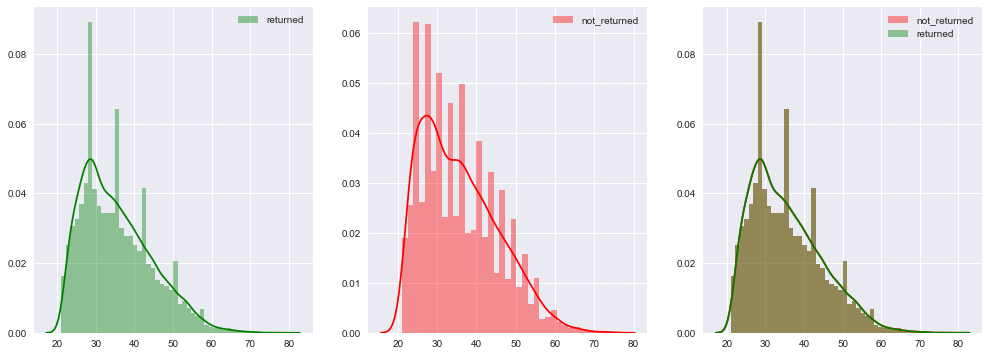

In [171]:
plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
sb.distplot(age_returned, color='green')
plt.legend(['returned'])

plt.subplot(1,3,2)
sb.distplot(age_not_returned, color='red')
plt.legend(['not_returned'])

plt.subplot(1,3,3)
sb.distplot(age_returned, color='red')
sb.distplot(age_returned, color='green')
plt.legend(['not_returned', 'returned'])

### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

1. В каждой из выборок должно быть не менее 3 значений признака - выполняеться
2. В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10) - выполняеться

In [172]:
scipy.stats.mannwhitneyu(limit_bal_not_returned, limit_bal_returned)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

<b>Нулевая гипотеза отвергается - между распределениями есть сдвиг.</b>